# **Computación Avanzada**

> 
#**Movimiento Browniano a partir de algoritmos de Monte Carlo** .




##Kimy Agudelo Jaramillo

##**Introducción**

El Movimiento Browniano fue descubierto por el botánico escocés Roben Brown en 1827, cuando observaba a través del microscopio partículas de polen en el agua, encontró que dichas partículas tenían un comportamiento de *movimiento oscilatorio rápido*, esto implica entonces que los granos de polen no permanecían estáticos sino que por el contrario estaban sometidos a movimientos oscilatorios, esto implicaba entonces que cada una de las partículas se dispersaba en una dimensión diferente. Por ello, el estudio de la mecánica estadística permite tener una mayor información sobre los sistemas a través del estudio de modelos estocáticos.  Inicialmenie Brown atribuyó este comportamiento  a que se trataba de células sexuales masculinas vivas; pero no tardó mucho en comprobar que el mismo comportamiento mostraban los granos de polen que llevaban décadas almacenados e, incluso, partículas inorgánicas suficientemente ligeras. 

El fenómeno fue atribuido a las corrientes de convección térmica del medio; pero la independencia de los movimientos seguidos por partículas próximas descartó rápidamente dicha explicación. Observaciones detalladas realizadas a partir de 1860 por Gouy y Exner, mostraron que la actividad del movimiento crece al disminuir el tamaño de las partículas,  sin que influya su densidad. 
En 1877 se sugerió la explicación cualitativa correcta, dicha explicación fue dada por Desaulx, en la cual explicaba que el movimiento de las partículas es debido a los impactos continuos que sufren por parte de las moléculas del medio, sometidas al movimiento térmico en direcciones aleatorias y con velocidades descritas por la distribución de Maxwell.  Cualquier partícula suficientemente grande para ser observada al microscopio, pero con inercia suficientemente pequeña, sufre constantes colisiones por parte de las moléculas que la rodean y cada colisión altera su velocidad en una dirección y con un módulo aleatoriamente determinados por la energía y la trayectoria de la molécula que la golpea.  Por lo tanto, como consecuencia, la trayectoria de la partícula cambia constantemente de dirección y produce el movimiento errático de la partícula.

Por lo cual desde entonces se dice que una partícula pequeña macroscópica inmersa en un fluido experimenta un movimiento aleatorio conocido como *movimiento Browniano* y revela las fluctuaciones estadísticas que afectan a la partícula en un sistema que generalmente se supone en equilibrio térmico. 



In [1]:
#------------------------------------------------------ Librerias------------------------------------------------
import math
import random 
import numpy as np 
import matplotlib.pyplot as plt


n=1000 # Número de pasos para simular movimientos Brownianos
x = np.cumsum(np.random.randn(n)) # Se simulan dos procesos brownianos unidimensionales independientes para 
# formar un solo proceso browniano bidimensional. Componente x
y = np.cumsum(np.random.randn(n)) # Componente y. 

# cumsum----> suma las posiciones nuevas que se van formando de forma aleatoria con base a las posiciones anteriores

k=20 # Agregamos 20 puntos intermedios entre dos puntos sucesivos. Interpolamos x y y
x2=np.interp(np.arange(n*k), np.arange(n)*k, x) #Se realiza una interpolación entre una caminata unidimensional independiente
y2=np.interp(np.arange(n*k), np.arange(n)*k, y) # Otra interpolación caminata unidimensional independiente

#---------------------------------------------   Graficación -------------------------------------------------------------


fig, ax= plt.subplots(1 , 1, figsize=(7,7))
ax.scatter(x2,y2, c=range(n*k), linewidths=0, marker='o', s=3, cmap=plt.cm.jet,) #Scatter---> función de graficaciópn para obtener
# una caminata, cmap---> gradiente de color. 
ax.axis('equal')
#ax.set_axis_off()
#ax.title('Movimiento Browniano')
'''plt.legend() 
plt.savefig('Brownian.pdf') 
plt.show()''' 
plt.title('Movimiento Browniano 2D ')
plt.savefig('Brownian.pdf') 



In [15]:

k=10 # Agregamos 10 puntos intermedios entre dos puntos sucesivos. Interpolamos x y y
n=10000 # Número de pasos para simular movimientos Brownianos.
n_2=n/k**2
n_3=n/k**3



x = np.cumsum(np.random.randn(n)) 
y = np.cumsum(np.random.randn(n))  

#------------------------------------------------------------------------------------------------------------------

x2=[] #Lista vacia para componente x, la cual tiene una resolución de 10, con n_2 iteracciones
y2=[] #Lista vacia para componente y, la cual tiene una resolución de 10, con n_2 iteracciones
x3=[] #Lista vacia para componente x, la cual tiene una resolución de 100, con n_3 iteracciones
#n_3 iteracciones----> 10000/10**3=10
y3=[] #Lista vacia para componente y, la cual tiene una resolución de 100, con n_3 iteracciones

#-------------------------------------------Bucles para resolución ----------------------------------------------------

for i in range(n):
  if i % n_3 == 0: #Se filtran las iteraciones 
    x2.append(x[i]) # si n_3 que es igual a 10 entonces pegue ese valor a la lista vacía
    #para x_2
    y2.append(y[i]) # si n_3 que es igual a 10 entonces pegue ese valor a la lista vacía
    #para y_2
  if i % n_2 == 0: 
    x3.append(x[i]) # si n_2 que es igual a 100 entonces pegue ese valor a la lista vacía
    #para x_3
    y3.append(y[i])

#-------------------------------------------- Gráficas ----------------------------------------------------------

fig, ax= plt.subplots(1 , 1, figsize=(6,6)) 
ax.plot(x,y, '-', color='magenta', alpha=0.7) 
plt.title('Movimiento Browniano 2D - 10000 iteraciones')
plt.savefig('MovimiBrow2Dxy.pdf') 




In [16]:
#----------------------------------------------- Gráficas 1000 iteraciones ---------------------------------------

fig, ax= plt.subplots(1 , 1, figsize=(6,6)) 
ax.plot(x2,y2, '--', color='blue', alpha=0.7) 
plt.title('Movimiento Browniano 2D - 1000 iteraciones')
plt.savefig('MovimiBrow2Dx2y2.pdf') 


In [17]:
#----------------------------------------------- Gráficas 100 iteraciones ---------------------------------------

fig, ax= plt.subplots(1 , 1, figsize=(6,6)) 
ax.plot(x3,y3, '-o', color='orange', alpha=1, linewidth=1.8)  
plt.title('Movimiento Browniano 2D - 100 iteraciones')
plt.savefig('MovimiBrow2Dx3y3.pdf') 

In [18]:
#-------------------------------------------------- Gráficas Autosimilitud --------------------------------------------

fig, ax= plt.subplots(1 , 1, figsize=(6,6)) 
ax.plot(x,y, 'magenta', x2, y2, 'blue', x3,y3,'orange', '-o', alpha=0.7)
plt.title('Movimiento Browniano - Autosimilitud')
plt.savefig('MovimiBrow2Djoin.pdf') 

##**Dimensión fractal**

In [19]:
fractaldimension= abs(np.log10(n_2)/np.log10(1/k))
print(f'Dimensión fractal: {fractaldimension}')

Dimensión fractal: 2.0


##**Zoom**

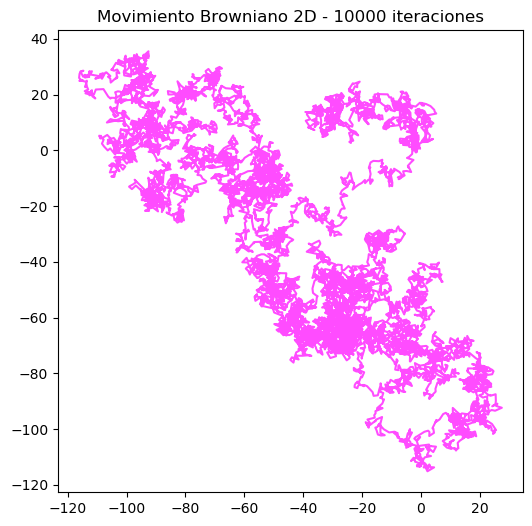

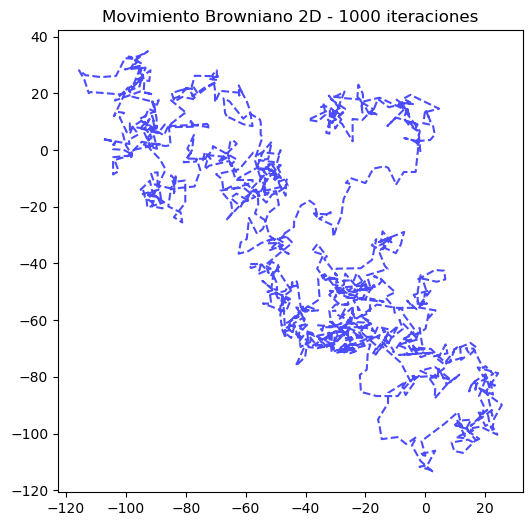

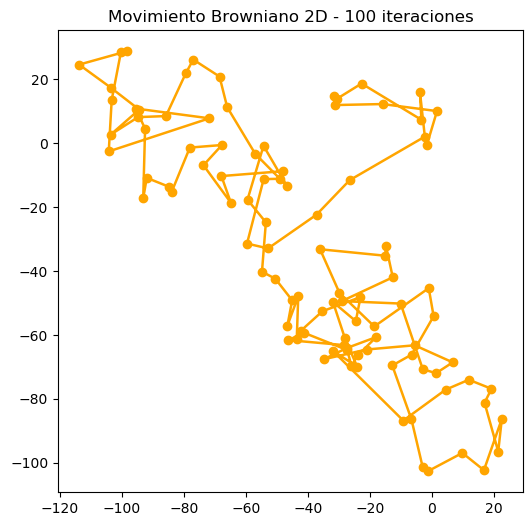

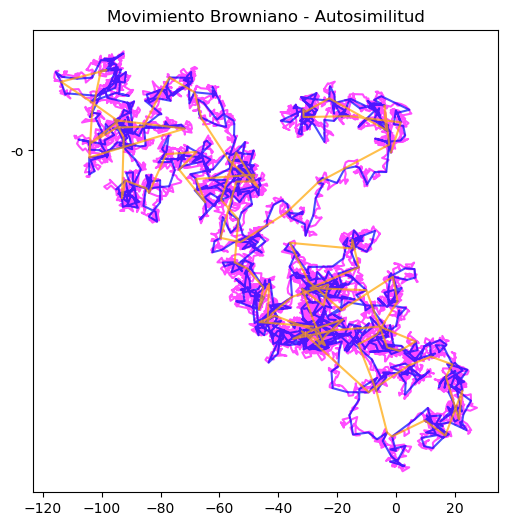

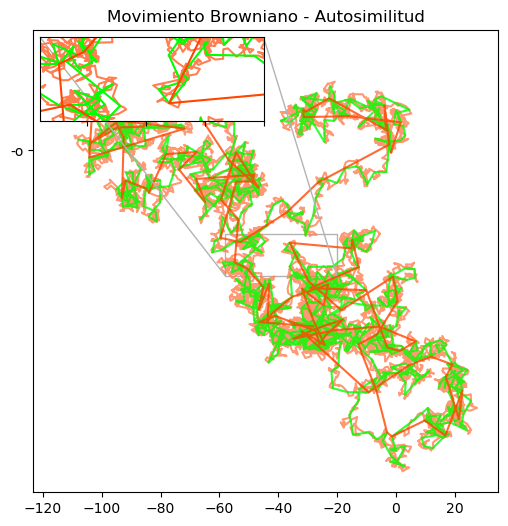

In [20]:
#-------------------------------------------------- Librerías ---------------------------------------------------

from mpl_toolkits import mplot3d
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

#-----------------------------------------------------------------------------------------------------------------

fig, ax= plt.subplots(1 , 1, figsize=(6,6)) 
ax.plot(x,y, 'coral', x2,y2, 'lime', x3,y3,'orangered', '-o', alpha=0.8, linewidth=1.5) # gráfica de autosimilitud del movimiento 
# Browniano. 
plt.title('Movimiento Browniano - Autosimilitud') # Título

axins=zoomed_inset_axes(ax, 2, loc=2) #zoom, loc=2 me representa la localización
axins.plot(x,y, 'coral', x2,y2, 'lime', x3,y3,'orangered', '-o', alpha=1.0) # gráfica de autosimilitud del movimiento pero lo que 
# queremos que se vea al hacer Zomm
axins.set_xlim(-58, -20) # Eje x del cuadro de Zoom
axins.set_ylim(-30, -45) # Eje y del cuadro de Zoom

plt.xticks(visible=False)
plt.yticks(visible=False)

mark_inset(ax, axins, loc1=1, loc2=2, fc="none", ec="0.7") # Inserta las líneas de Zoom, la gráfica ax y la lozalización
plt.savefig('MovimiBrow2DjoinZOOM.pdf') 
plt.draw()
plt.show()

**Incrementando el número de pasos** 

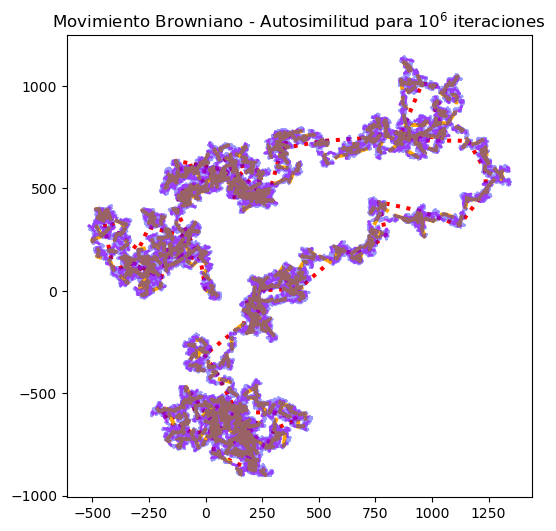

In [21]:
n=1000000

n_2=n/k**2
n_3=n/k**3
n_4=n/k**4
#--------------------------------------------------------------------------------------------------------------

x = np.cumsum(np.random.randn(n)) 
y = np.cumsum(np.random.randn(n)) 

#--------------------------------------------------------------------------------------------------------------

x2=[] #componente x, con n_2 iteracciones ----> n_2 : 10000 iteraciones
y2=[] 
x3=[] #componente x, con n_3 iteracciones ----> n_3 : 1000 iteraciones
y3=[] 
x4=[] #componente x, con n_4 iteracciones ----> n_4 : 100 iteraciones
y4=[] 

#-------------------------------------------Bucles para resolución ----------------------------------------------------

for i in range(n):
  if i % n_4 == 0: #Se filtran las iteraciones
    x3.append(x[i])
    y3.append(y[i])
  if i % n_3 == 0:
    x2.append(x[i])
    y2.append(y[i])
  if i % n_2 == 0:
    x4.append(x[i])
    y4.append(y[i])


#-------------------------------------------------- Gráfica Autosimilitud --------------------------------------------

plt.figure(figsize=(6,6))
plt.plot(x4,y4,  color='r',  linestyle = 'dotted', linewidth=2.9)
plt.plot(x3,y3,  color='magenta', linestyle = 'dashed', linewidth=1.9, alpha=0.6)
plt.plot(x2,y2, color='orange', linewidth=2.8,  linestyle = 'dashed')
plt.plot(x,y, color='b',  linestyle = 'dotted' , linewidth=1.8, alpha=0.4)
plt.title('Movimiento Browniano - Autosimilitud para $10^6$ iteraciones')
plt.savefig('MovimiBrow2Djoin107.pdf') 
plt.show()

##**Simulacion de un movimiento Browniano simple** 

El cambio en una variable $z$ que sigue un movimiento Browniano durante un intervalo de tiempo $dt$ se define como:

\begin{equation}
dz= \xi \sqrt dt
\end{equation}

donde $\xi$ es una variable aleatoria Gaussiana com media en cero y varianza 1. Para $n$ intervalos sucesivos durante un tiempo t se tendra:

\begin{equation}
dt= \frac{t}{n} 
\end{equation} 


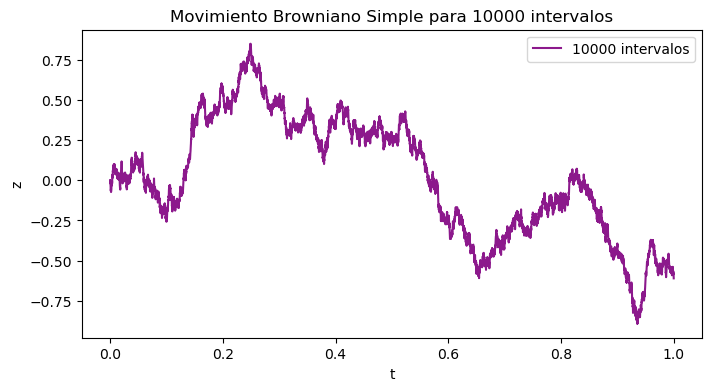

In [22]:
k=10
n=10000 # Número de pasos para simular movimientos Brownianos, tomamos n=10.000
n_2=1000
n_3=10

T = 1.0
dt= T/n
t= np.linspace(0.0, T, n)
z=np.zeros(n)
z2=np.zeros(n_2)
z3=np.zeros(n_3)

for i in range(n-1):
  z[i + 1] = z[i] + np.sqrt(dt)*np.random.randn()

for i in range(n_2-1):
  z2[i + 1] = z2[i] + np.sqrt(dt)*np.random.randn()

for i in range(n_3-1):
  z3[i + 1] = z3[i] + np.sqrt(dt)*np.random.randn()

fig, ax= plt.subplots(1 , 1, figsize=(8,4))
ax.plot(t,z,label = "10000 intervalos", color='purple', alpha=0.9, lw=1.5)
plt.xlabel('t')
plt.title('Movimiento Browniano Simple para 10000 intervalos')
plt.ylabel('z')
plt.legend()
plt.savefig('Browniansimple.pdf') 
plt.show() 

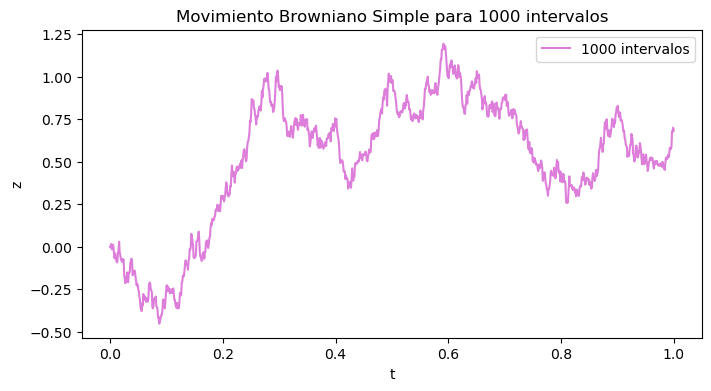

In [23]:
k=10
n=1000 # Número de pasos para simular movimientos Brownianos, tomamos n=1000

T = 1.0
dt= T/n
t= np.linspace(0.0, T, n)
z=np.zeros(n)


for i in range(n-1):
  z[i + 1] = z[i] + np.sqrt(dt)*np.random.randn()


fig, ax= plt.subplots(1 , 1, figsize=(8,4))
ax.plot(t,z,label = "1000 intervalos", color='orchid', alpha=0.9, lw=1.5)
plt.xlabel('t')
plt.title('Movimiento Browniano Simple para 1000 intervalos')
plt.ylabel('z')
plt.legend() 
plt.savefig('Brownian2-2.pdf') 
plt.show() 

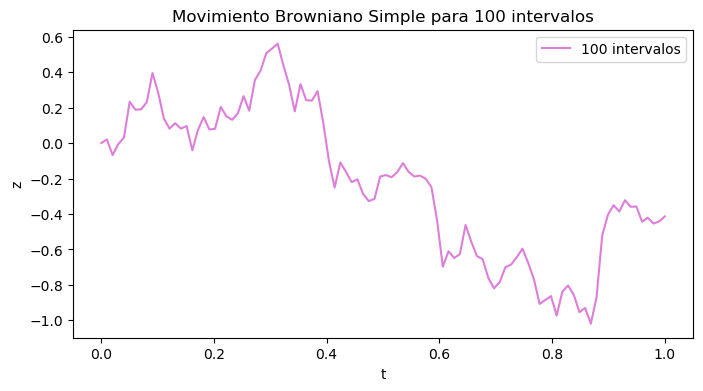

In [24]:
k=10
n=100 # Número de pasos para simular movimientos Brownianos, tomamos n=10.000

T = 1.0
dt= T/n
t= np.linspace(0.0, T, n)
z=np.zeros(n)


for i in range(n-1):
  z[i + 1] = z[i] + np.sqrt(dt)*np.random.randn()


fig, ax= plt.subplots(1 , 1, figsize=(8,4))
ax.plot(t,z,label = "100 intervalos", color='orchid', alpha=0.9, lw=1.5)
plt.xlabel('t')
plt.title('Movimiento Browniano Simple para 100 intervalos')
plt.ylabel('z')
plt.legend()
plt.savefig('Brownian2-3.pdf') 
plt.show() 

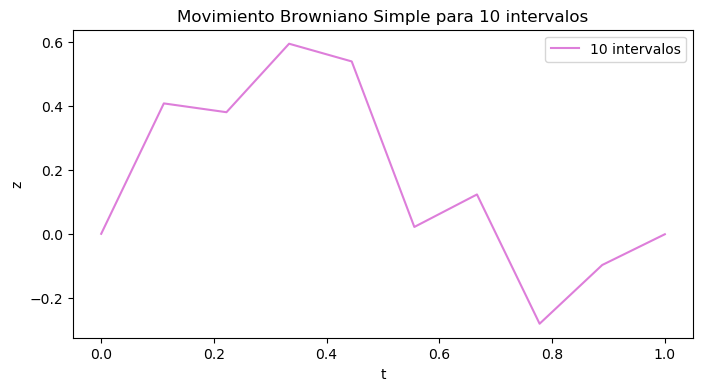

In [25]:
k=10
n=10 # Número de pasos para simular movimientos Brownianos, tomamos n=10.000

T = 1.0
dt= T/n
t= np.linspace(0.0, T, n)
z=np.zeros(n)


for i in range(n-1):
  z[i + 1] = z[i] + np.sqrt(dt)*np.random.randn()


fig, ax= plt.subplots(1 , 1, figsize=(8,4))
ax.plot(t,z,label = "10 intervalos", color='orchid', alpha=0.9, lw=1.5)
plt.xlabel('t')
plt.title('Movimiento Browniano Simple para 10 intervalos')
plt.ylabel('z')
plt.legend() 
plt.savefig('Brownian2-4.pdf') 
plt.show() 

##**Movimiento Browniano Generalizado - Wiener Generalizado**

Una variable $x$ que siga un movimiento de Brown generalizado esta dada por: 

\begin{equation}
dx = a dt+ bdz 
\end{equation}

donde $a$ y $b$ son constantes. El modelo de tiempo discreto correspondiente es:

\begin{equation}
\Delta x = a \Delta t+ b \varepsilon \sqrt{ \Delta t}
\end{equation}

y el cambio en el valor $x$ desde el tiempo 0 al tiempo $t$ es:

\begin{equation}
x(t) - x(0) = a  \Delta t + b \sum_{i=0}^{i=n} \varepsilon_i \sqrt{ \Delta t}
\end{equation}



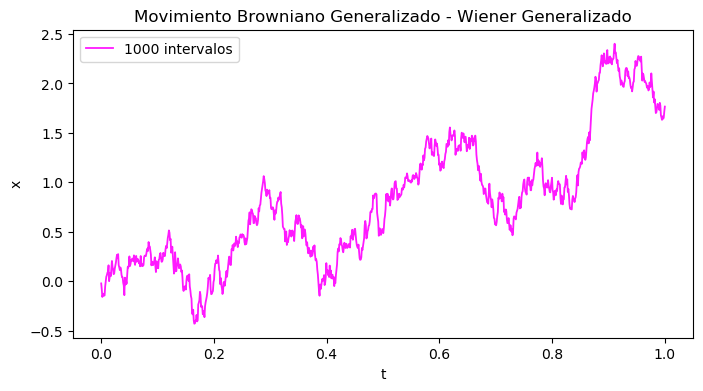

In [27]:
T = 1.0
n = 1000
dt= T/n
t= np.linspace(0.0, T, n)
dz=np.sqrt(dt)*np.random.randn(1,n)
dx=0.4*dt + 1.8*dz
x=np.cumsum(dx)
fig, ax= plt.subplots(1 , 1, figsize=(8,4))
ax.plot(t,x, lw=1.3, label='1000 intervalos', color='magenta', alpha=0.9)
plt.xlabel('t')
plt.title('Movimiento Browniano Generalizado - Wiener Generalizado')
plt.ylabel('x')
plt.legend() 
plt.savefig('Brownian3.pdf') 
plt.show() 

##**Validez de la ecuacion de difusión**

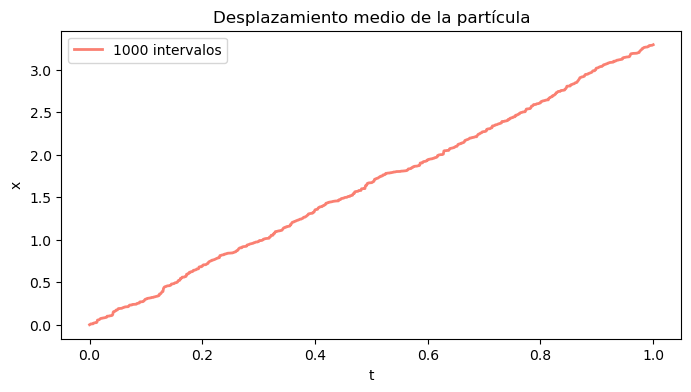

In [28]:
x_dif=np.cumsum(dx**2) 

fig, ax= plt.subplots(1 , 1, figsize=(8,4))

ax.plot(t,x_dif, lw=2, label='1000 intervalos' , color='salmon', alpha=1.0)
plt.xlabel('t')
plt.title('Desplazamiento medio de la partícula')
plt.ylabel('x')
plt.legend() 
plt.savefig('difu.pdf') 
plt.show() 

## **Ecuacion de Langevin** 

Considere la siguiente ecuación diferencial estocástica (Ornstein-Uhlenbeck):

\begin{equation}
dx = -\frac{x- \mu}{\tau} dt + \sigma \sqrt{\frac{2}{\tau}}dW
\end{equation}

donde $x(t)$ es la variable estocástica, $dx$ su incremento infinitesimal, $\mu$ la media, $\sigma$ la desviación estándar, $\tau$ la constante de tiempo y $W$ hace referencia al movimiento Browniano que subyace a la ecuación diferencial. 
El primer término es determinista mientras el segundo es un término estocástico. 
El paso infinitesimal del movimiento Browniano es la variable aleatoria Gaussiana $ξ$ con varianza 1 (independiente de cada paso de tiempo). 

La solución consiste en discretizar el tiempo (método **Euler-Maruyama**) y anadir  pasos infinitesimales al proceso en cada paso de tiempo:

\begin{equation}
dx = a(t,x )dt + b(t,x)dW
\end{equation}

con $t = n ∗ dt$, de manera que:

\begin{equation}
x_{n+1}=x_{n} + dx = x_{n} + a(t,x_n )dt + b(t,x_n) \sqrt{dt} \xi
\end{equation}

Con, $\xi\sim N(0,1)$. El factor de normalización
$\sqrt{dt}$ $dt$ viene del hecho que el paso infinitesimal para un movimiento Browniano tiene desviación estándar $\sqrt{dt}$


Lo anterior es el modelo que describe el movimiento de una partícula en un fluido con presencia de fricción. El siguiente programa permite obtener la evolución temporal del proceso: 

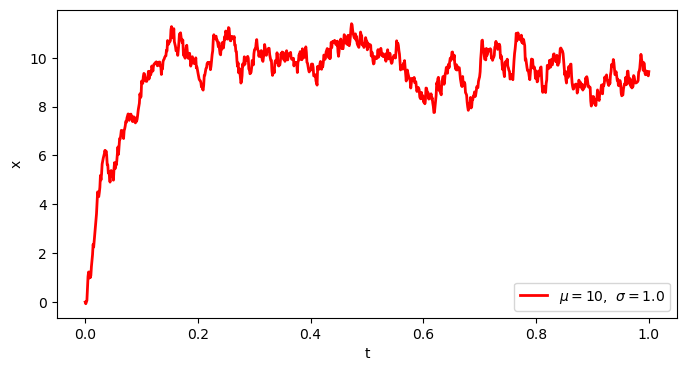

In [29]:
sigma= 1.0
mu=10.0
tau=0.05


dt=.001
T= 1.0
n=int(T/dt)
t= np.linspace(0.0, T, n)
sigma_bis=sigma*np.sqrt(2.0/ tau)
sqrtdt=np.sqrt(dt)

x=np.zeros(n)
#for mu in range(mu-1):
for i in range(n-1):
  x[i + 1] = x[i] + dt*(-(x[i] - mu)/ tau) + sigma_bis*sqrtdt*np.random.randn()


fig, ax= plt.subplots(1 , 1, figsize=(8,4))
ax.plot(t,x, label = "$\mu=10$,  $\sigma=1.0$", lw=2, color='red')
plt.xlabel('t')
plt.ylabel('x')
plt.legend() 
plt.savefig('Brownianmu10.pdf') 
plt.show()

##**Realizando variaciones en el parámatro $\mu$**

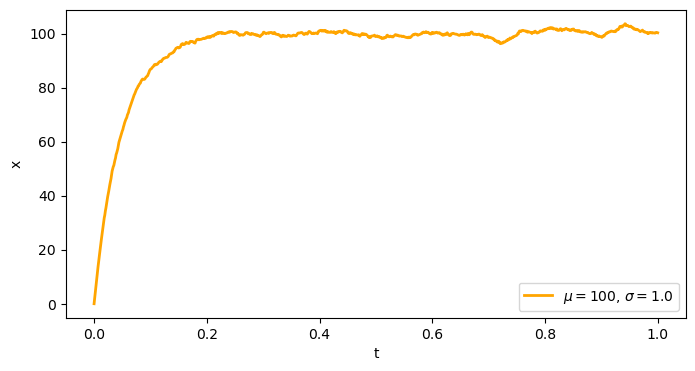

In [30]:
sigma= 1.0
mu1=100.0

for i in range(n-1):
  x[i + 1] = x[i] + dt*(-(x[i] - mu1)/ tau) + sigma_bis*sqrtdt*np.random.randn()


fig, ax= plt.subplots(1 , 1, figsize=(8,4))
ax.plot(t,x, lw=2, alpha=1, label = "$\mu=100$, $\sigma=1.0$",color='orange')
plt.xlabel('t')
plt.ylabel('x')
plt.legend() 
plt.savefig('Brownianmu100.pdf') 
plt.show() 

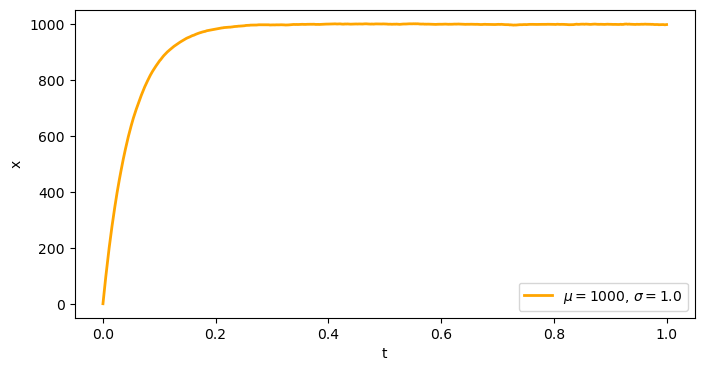

In [31]:
sigma= 1.0
mu2=1000.0

for i in range(n-1):
  x[i + 1] = x[i] + dt*(-(x[i] - mu2)/ tau) + sigma_bis*sqrtdt*np.random.randn()


fig, ax= plt.subplots(1 , 1, figsize=(8,4))
ax.plot(t,x, lw=2, label = "$\mu = 1000$, $\sigma=1.0$", color='orange')
plt.xlabel('t')
plt.ylabel('x')
plt.legend() 
plt.savefig('Brownianmu1000.pdf') 
plt.show() 

##**Realizando variaciones en el parámatro $\sigma$**

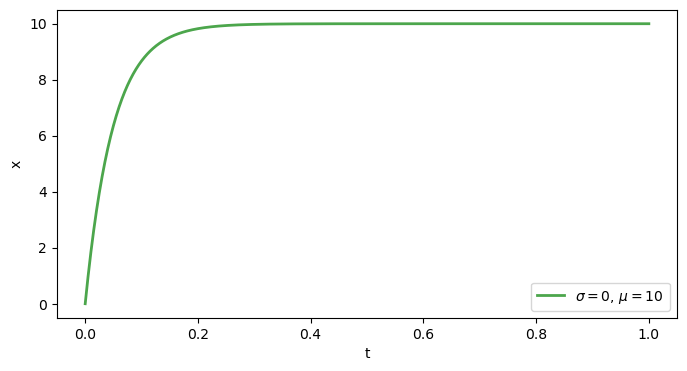

In [32]:
sigma1= 0
mu=10.0
tau=0.05


dt=.001
T= 1.0
n=int(T/dt)
t= np.linspace(0.0, T, n)
sigma_bis=sigma1*np.sqrt(2.0/ tau)
sqrtdt=np.sqrt(dt)

x=np.zeros(n)
#for mu in range(mu-1):
for i in range(n-1):
  x[i + 1] = x[i] + dt*(-(x[i] - mu)/ tau) + sigma_bis*sqrtdt*np.random.randn()


fig, ax= plt.subplots(1 , 1, figsize=(8,4))
ax.plot(t,x, label = "$\sigma=0$, $\mu=10$ ", alpha=0.7, lw=2, color='green')
plt.xlabel('t')
plt.ylabel('x')
plt.legend() 
plt.savefig('Browniansigma0.pdf') 
plt.show() 

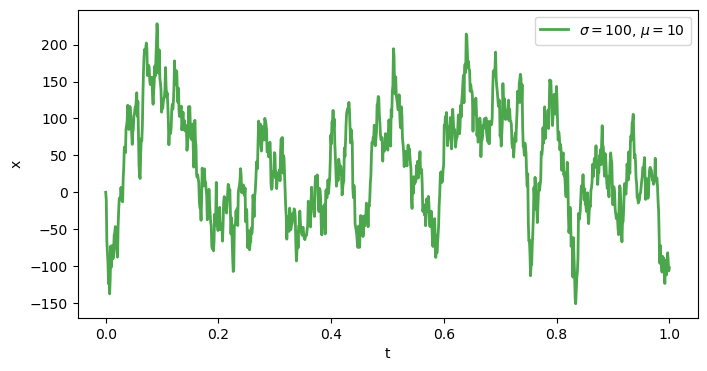

In [33]:
sigma1= 100
mu=10.0
tau=0.05
sigma_bis=sigma1*np.sqrt(2.0/ tau)

for i in range(n-1):
  x[i + 1] = x[i] + dt*(-(x[i] - mu)/ tau) + sigma_bis*sqrtdt*np.random.randn()


fig, ax= plt.subplots(1 , 1, figsize=(8,4))
ax.plot(t,x, label = "$\sigma=100$, $\mu=10$", alpha=0.7, lw=2, color='green')
plt.xlabel('t')
plt.ylabel('x')
plt.legend() 
plt.savefig('Browniansigma100.pdf') 
plt.show() 

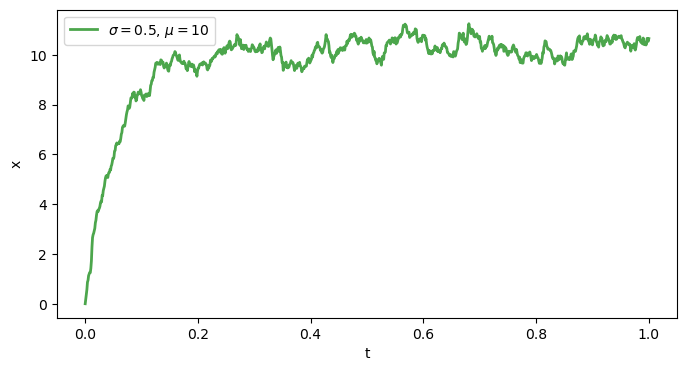

In [34]:
sigma1= 0.5
mu=10.0
tau=0.05
sigma_bis=sigma1*np.sqrt(2.0/ tau)

for i in range(n-1):
  x[i + 1] = x[i] + dt*(-(x[i] - mu)/ tau) + sigma_bis*sqrtdt*np.random.randn()


fig, ax= plt.subplots(1 , 1, figsize=(8,4))
ax.plot(t,x, label = "$\sigma=0.5$, $\mu=10$", alpha=0.7, lw=2, color='green')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.savefig('Browniansigma05.pdf') 
plt.show() 

##**Histogramas para $t=0.01, t= 0.05, t= 0.9$** 

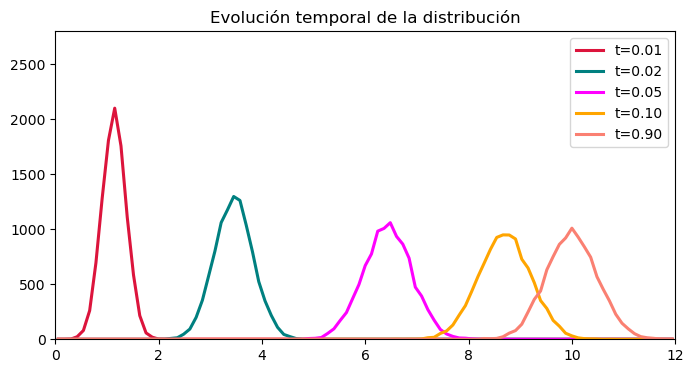

In [35]:
dt=0.001 # representa el dt
ntrials = 10000 #pasos o pruebas

x_ne = np.zeros(ntrials) #Definimos un arreglo vacío para guardas los datos de la función en 
# una evolución temporal.

bins = np.linspace(0, 12.0, 100) #Bins para los tres histogramas correspondientes a los tres valores de t
fig, ax = plt.subplots(1, 1, figsize=(8, 4))  

#-----------------------------------------------------------------------------------------------------------

for i in range(n):
    x_ne = x_ne + dt * (-(x_ne - mu) / tau) + sigma_bis * sqrtdt * np.random.randn(ntrials) #Ecuación de Langevin

    if i in (5, 20, 50, 100, 900): # Tiempo, t=5*0.001, t=20*0.001, etc..
        hist, _ = np.histogram(x_ne, bins=bins) 
        ax.plot((bins[1:] + bins[:-1]) / 2, hist, {5: 'crimson', 20:'teal', 50: 'magenta', 900: 'salmon', 100:'orange',}[i],
                label=f"t={i * dt:.2f}", linewidth=2.2) #gráfica los histogramas. 
        ax.legend()
plt.title('Evolución temporal de la distribución') 
plt.xlim(0,12)
plt.ylim(0,2800)
plt.savefig('histogramas.pdf') 
plt.show() 

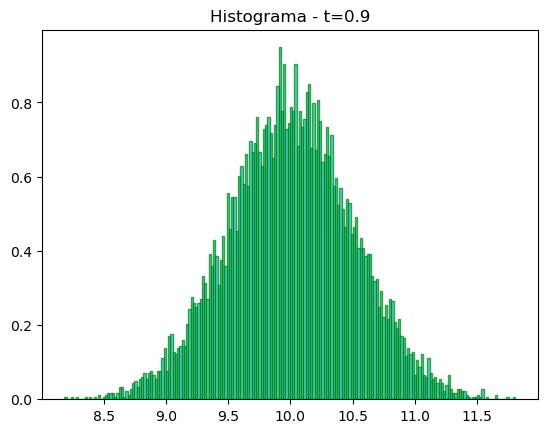

In [36]:
n, bins , patches = plt.hist(x_ne,  facecolor='c',edgecolor = 'g', alpha= 0.7, bins=200,density=True,label= "Histograma" )
plt.title('Histograma - t=0.9') 
plt.savefig('histogramast09.pdf') 
plt.show() 


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


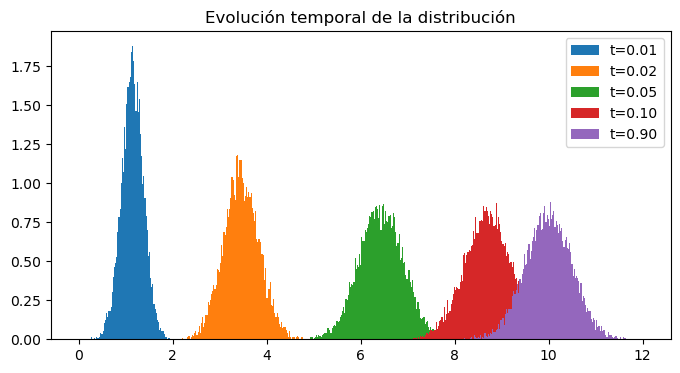

In [37]:
n=int(T/dt)
dt=0.001 # representa el dt
ntrials = 10000 #pasos o pruebas

x_ne = np.zeros(ntrials) 

bins = np.linspace(0, 12.0, 500) 
fig, ax = plt.subplots(1, 1, figsize=(8, 4)) 

#-----------------------------------------------------------------------------------------------------------

for i in range(n):
    x_ne = x_ne + dt * (-(x_ne - mu) / tau) + sigma_bis * sqrtdt * np.random.randn(ntrials) #Ecuación de Langevin

    if i in (5, 20, 50, 100, 900): # Tiempo, t=5*0.001, t=20*0.001, etc..
        # hist, _ = np.histogram(x_ne, bins=bins) #histogramas
        ax.hist(x_ne, bins=bins, density=True, label=f"t={i * dt:.2f}" ) 
    ax.legend()
plt.title('Evolución temporal de la distribución') 
plt.savefig('histogramas1.pdf') 
plt.show() 

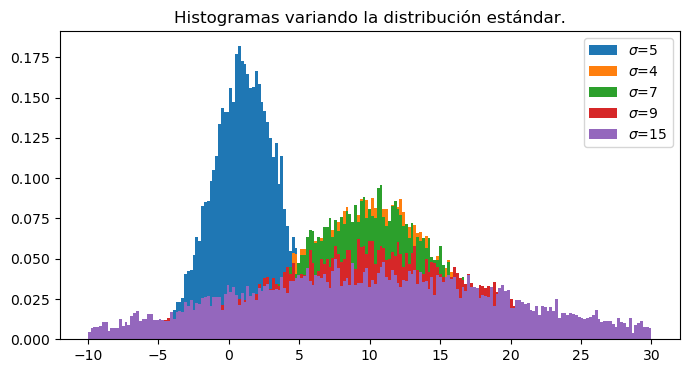

In [38]:
ntrials = 10000 #pasos o pruebas

x_ne = np.zeros(ntrials)

bins = np.linspace(-10, 30, 200) 
fig, ax = plt.subplots(1, 1, figsize=(8, 4)) 
c = ['b','g','c'] 
#-----------------------------------------------------------------------------------------------------------
for j in (5,4,7,9,15):
  sigma=j
  mu=10
  tau=0.05
  dt=.001
  T= 1.0
  n=int(T/dt)
  t= np.linspace(0.0, T, n)
  sigma_bis=j*np.sqrt(2.0/ tau)
  sqrtdt=np.sqrt(dt)

  for i in range(n):
      x_ne = x_ne + dt * (-(x_ne - mu) / tau) + sigma_bis * sqrtdt * np.random.randn(ntrials) #Ecuación de Langevin
      if i==5: # Tiempo, t=5*0.001, t=20*0.001, etc..
        # hist, _ = np.histogram(x_ne, bins=bins) #histogramas
        ax.hist(x_ne, bins=bins, density=True, label=f"$\sigma$={j}" ) 
        ax.legend()
plt.title('Histogramas variando la distribución estándar.') 
plt.savefig('histogramas2.pdf') 
plt.show() 

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


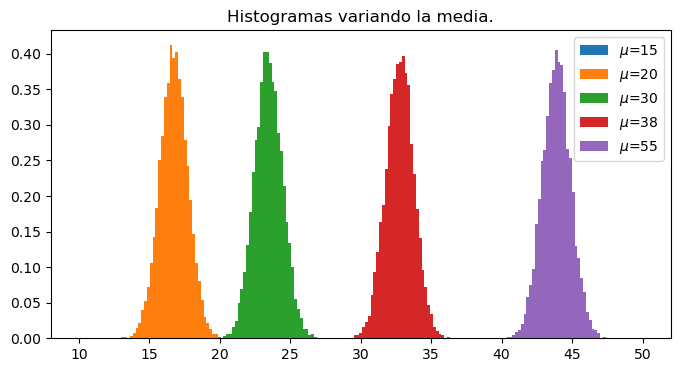

In [40]:
ntrials = 10000 #pasos o pruebas

x_ne = np.zeros(ntrials) 

bins = np.linspace(10, 50, 200) 
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
c = ['b','g','c'] 
#-----------------------------------------------------------------------------------------------------------
for j in (15,20,30,38,55):
  sigma=1.0
  mu=j
  tau=0.05
  dt=.001
  T= 1.0
  n=int(T/dt)
  t= np.linspace(0.0, T, n)
  sigma_bis=sigma*np.sqrt(2.0/ tau)
  sqrtdt=np.sqrt(dt)

  for i in range(n):
      x_ne = x_ne + dt * (-(x_ne - j) / tau) + sigma_bis * sqrtdt * np.random.randn(ntrials) #Ecuación de Langevin
      if i==20: # Tiempo, t=5*0.001, t=20*0.001, etc..
        # hist, _ = np.histogram(x_ne, bins=bins) #histogramas
        ax.hist(x_ne, bins=bins, density=True, label=f"$\mu$={j}" ) 
        ax.legend()
plt.title('Histogramas variando la media.') 
plt.savefig('histogramas3.pdf') 
plt.show() 

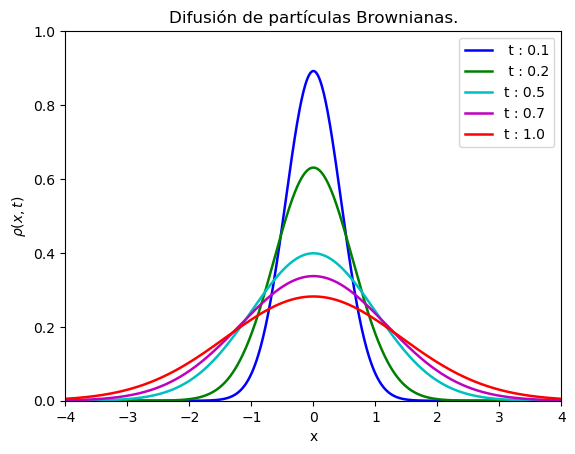

In [39]:

#----------------------------------------------- Librerias --------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt 
import math

#-------------------------------------------------------------------------------------------------------------


def rho(t):
    return lambda x: 1/( ( 4*np.pi*t)**.5) * np.e ** ((-(x)**2)/(4*t) ) # definimos la funcion de probabilidad
    # clasica de encontrar la particula en una posicion x, en terminos de beta=1/T

def main():
    ax = plt.figure().add_subplot(1,1,1)
    x = np.arange(-4, 4, 0.01) 
    b = ([0.1, 0.2, 0.5, 0.7, 1.0])  
    c = ['b','g','c','m', 'r'] 

    for t, color in zip(b, c): 
        rhoclasica = rho(t)(x) 
        ax.plot(x, rhoclasica, color, linewidth=1.8) 

    plt.xlim(-4, 4) 
    plt.xlabel("x") 
    plt.ylim(0, 1.0) 
    plt.ylabel("$ ρ(x,t)$") 
    plt.title("Difusión de partículas Brownianas.") 
    plt.legend([ ' t : 0.1', ' t : 0.2', 't : 0.5', 't : 0.7', 't : 1.0'], loc='best')
    plt.savefig('rhoclasica.png') #
    plt.savefig('rhoclasica.pdf') 
    plt.show() 


if __name__ == '__main__':
    main()